Epoch 1/20


/Users/ishankanodia/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6496 - loss: 0.6735 - val_accuracy: 0.8217 - val_loss: 0.4049
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.8254 - loss: 0.4092 - val_accuracy: 0.8607 - val_loss: 0.3211
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8648 - loss: 0.3212 - val_accuracy: 0.8802 - val_loss: 0.2735
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.8867 - loss: 0.2914 - val_accuracy: 0.8935 - val_loss: 0.2470
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.8769 - loss: 0.3068 - val_accuracy: 0.8332 - val_loss: 0.3745
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.8671 - loss: 0.2938 - val_accuracy: 0.9024 - val_loss: 0.2324
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.8884 - loss: 0.2748 - val_accuracy: 0.8971 - val_loss: 0.2265
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9001 - loss: 0.2484 - val_accuracy: 0.913

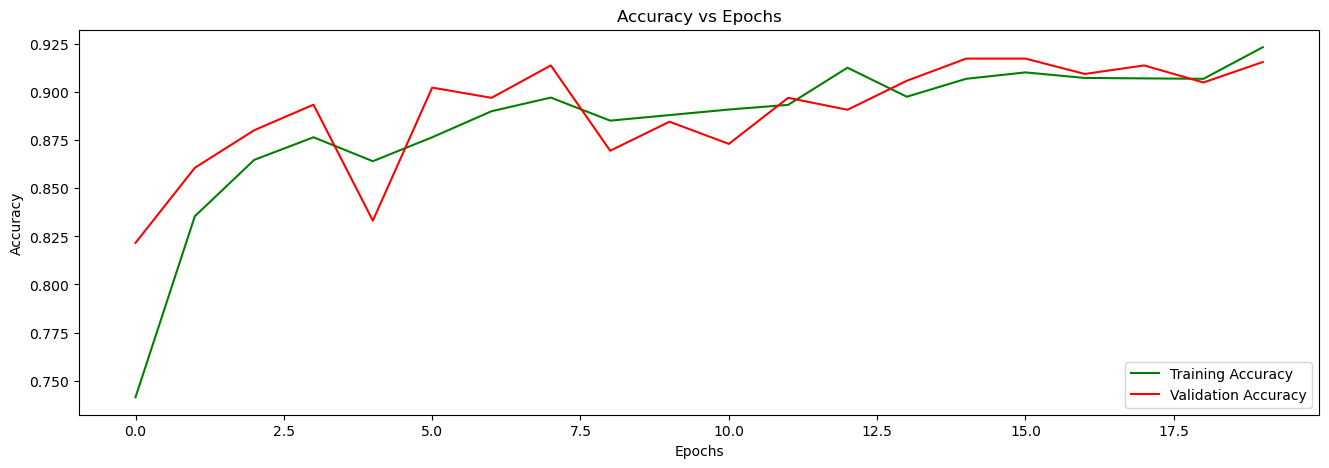

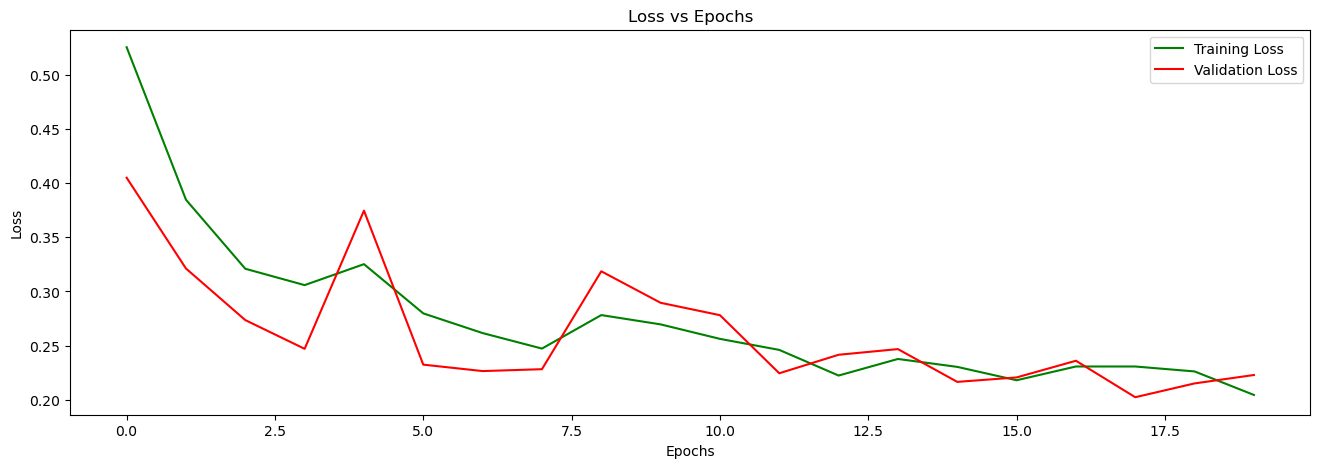

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9280 - loss: 0.2003
Final Validation Accuracy: 91.57%


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import numpy as np

# Update the path to your dataset directory
train_path = "/Users/ishankanodia/Downloads/data"
batch_size = 32
height = 72
width = 128

# Function to load images from directory and return as numpy arrays
def load_images_from_directory(directory):
    images = []
    labels = []
    class_names = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    for idx, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img = tf.keras.preprocessing.image.load_img(
                    os.path.join(class_dir, filename),
                    target_size=(height, width))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
                labels.append(idx)
    return (np.array(images), np.array(labels))

# Loading the dataset
try:
    images, labels = load_images_from_directory(train_path)
except FileNotFoundError:
    print(f"Directory '{train_path}' not found. Please check the path and try again.")
    # Handle the error or exit gracefully if the directory is not found

# Splitting into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    images, labels, test_size=0.2, random_state=1234)

# Data augmentation and normalization
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Creating data generators
train_generator = train_datagen.flow(
    train_images, train_labels,
    batch_size=batch_size)

val_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255).flow(
    val_images, val_labels,
    batch_size=batch_size)

# CNN model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(height, width, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4)  # Output layer with 4 neurons for 4 classes
])

# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the model
epochs = 20
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

# Plotting accuracy and loss
plt.figure(figsize=(16, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend(loc='lower right')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend(loc='upper right')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

# Evaluating on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")
